In [2]:
import json
from pathlib import Path
import matplotlib.pyplot as plt

# load generated, filtered and rejected qa data
filtered_dir = Path("../data/generated/filtered")
rejected_dir = Path("../data/generated/rejected")
generated_dir = Path("../data/generated")

        
filtered_qa = []
for file in filtered_dir.glob("*.json"):
    with file.open("r") as f:
        filtered_qa.extend(json.load(f))
        
rejected_qa = []
for file in rejected_dir.glob("*.json"):
    with file.open("r") as f:
        rejected_qa.extend(json.load(f))
        
        
generated_qa = []
for file in generated_dir.glob("*.json"):
    with file.open("r") as f:
        generated_qa.extend(json.load(f))
        
#assert len(generated_qa) == len(filtered_qa) + len(rejected_qa), "Data mismatch: generated data should equal filtered + rejected data"
print(len(generated_qa), "generated QA pairs")
print(f"{len(rejected_qa) / len(generated_qa) * 100:.2f}% of the data was flagged as low quality by the filtering process")

485 generated QA pairs
0.21% of the data was flagged as low quality by the filtering process


In [3]:
metric_names = ['faithfulness', 'answer_relevancy']

# load metrics from the filtered + rejected data and show histograms
def load_metrics(qa_data):
    metrics = {name: [] for name in metric_names}
    for qa in qa_data:
        for name in metric_names:
            metrics[name].append(qa['metrics'][name])
    return metrics

metrics_filtered = load_metrics(filtered_qa + rejected_qa)

# print summary statistics for each metric
def print_summary_statistics(metrics):
    for name in metric_names:
        values = metrics[name]
        print(f"{name} - Mean: {sum(values) / len(values):.2f}, Min: {min(values):.2f}, Max: {max(values):.2f}, Std: {((sum((x - (sum(values) / len(values))) ** 2 for x in values) / len(values)) ** 0.5):.2f}")
print_summary_statistics(metrics_filtered)

faithfulness - Mean: 1.00, Min: 0.14, Max: 1.00, Std: 0.04
answer_relevancy - Mean: 0.95, Min: 0.80, Max: 1.00, Std: 0.05


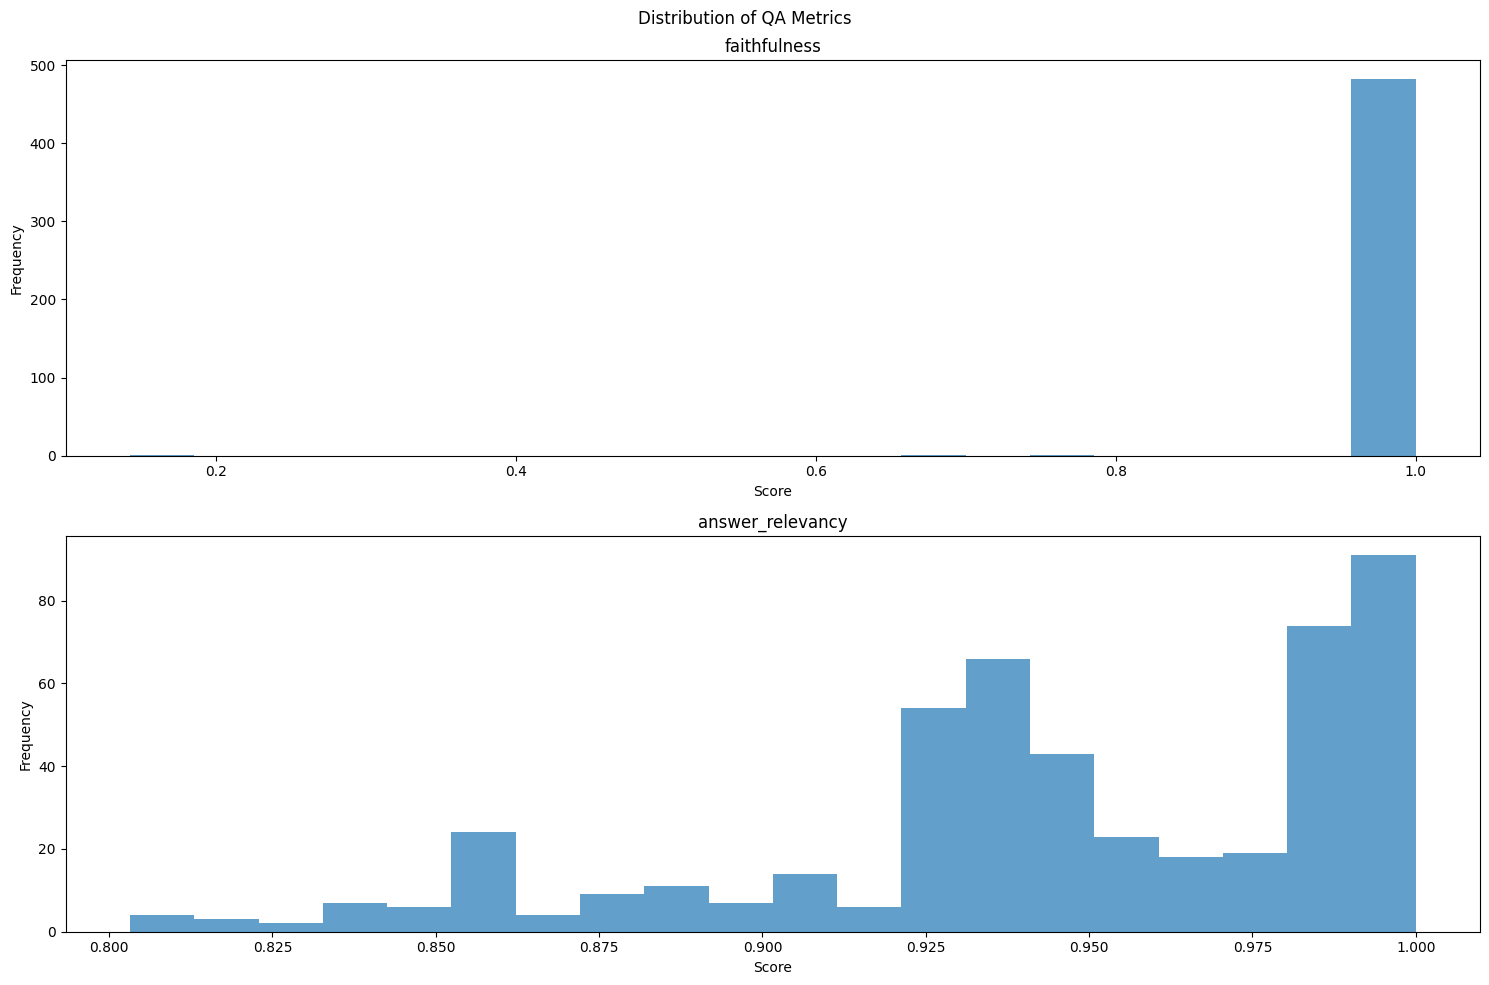

In [5]:
# plot histograms for each metric
def plot_metrics(metrics, title):
    plt.figure(figsize=(15, 10))
    for i, name in enumerate(metric_names):
        plt.subplot(2, 1, i + 1)
        plt.hist(metrics[name], bins=20, alpha=0.7)
        # if name == 'answer_relevancy':
        #     plt.axvline(x=0.7, color='r', linestyle='--', label='Threshold (0.7)')
        # elif name == 'context_precision':
        #     plt.axvline(x=0.65, color='r', linestyle='--', label='Threshold (0.65)')
        # else:
        #     plt.axvline(x=0.9, color='r', linestyle='--', label='Threshold (0.9)')
        plt.title(name)
        plt.xlabel('Score')
        plt.ylabel('Frequency')
    plt.suptitle(title)
    plt.tight_layout()
    #plt.show()
    # save the plot
    plt.savefig(f"{title.replace(' ', '_').lower()}.png")
    
plot_metrics(metrics_filtered, "Distribution of QA Metrics")